## Chapter 4
# Physical Basis of Sound

Below are some simple explorations of the way displacement, velocity work and kinetic energy relate to various types of acceleration.

Text(0.5,0.98,'Constant acceleration')

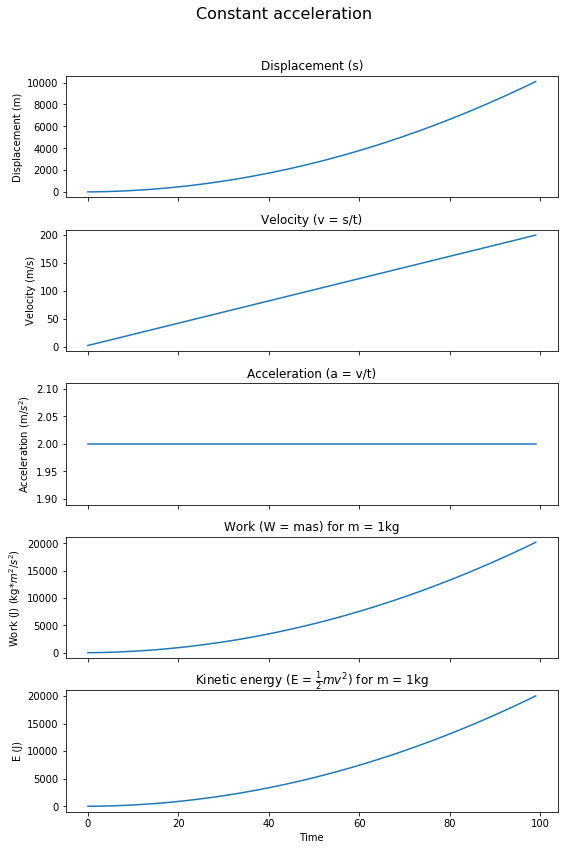

In [1]:
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

def plot_acceleration(accelerations):
    velocities = accelerations.cumsum()
    displacements = velocities.cumsum()

    fig, axes = plt.subplots(5, 1, figsize=(8, 12), sharex='all')
    axes[0].plot(displacements)
    axes[0].set_title('Displacement (s)')
    axes[0].set_ylabel('Displacement (m)')

    axes[1].plot(velocities)
    axes[1].set_title('Velocity (v = s/t)')
    axes[1].set_ylabel('Velocity (m/s)')

    axes[2].plot(accelerations)
    axes[2].set_title('Acceleration (a = v/t)')
    axes[2].set_ylabel('Acceleration (m/$s^2$)')
    
    axes[3].plot(accelerations * displacements)
    axes[3].set_title('Work (W = mas) for m = 1kg')
    axes[3].set_ylabel('Work (J) (kg*$m^2$/$s^2$)')

    axes[4].plot((velocities ** 2) / 2)
    axes[4].set_title('Kinetic energy (E = $\\frac{1}{2}mv^2$) for m = 1kg')
    axes[4].set_xlabel('Time')
    axes[4].set_ylabel('E (J)')
    
    fig.tight_layout()
    fig.subplots_adjust(top=0.9)
    return fig

constant_acceleration = 2
fig = plot_acceleration(np.full(100, constant_acceleration))
fig.suptitle('Constant acceleration', size=16)

Text(0.5,0.98,'Decreasing acceleration')

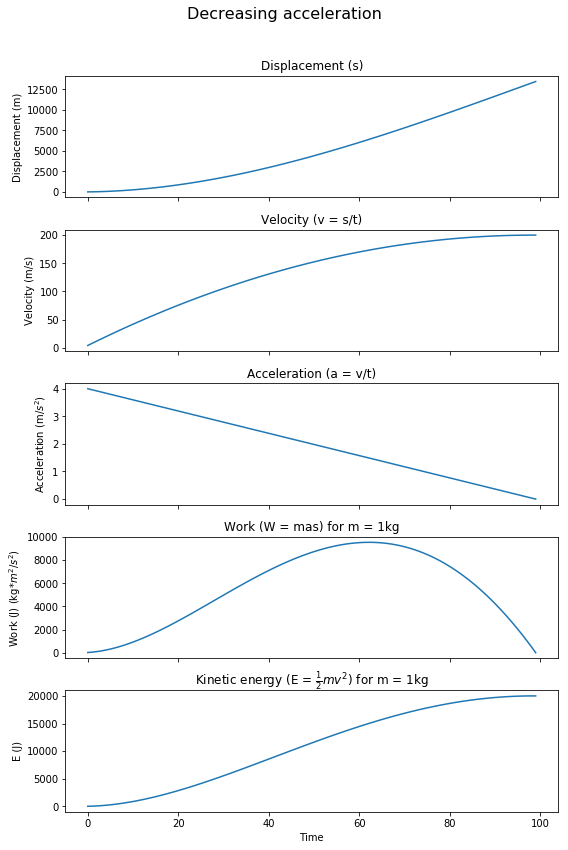

In [2]:
fig = plot_acceleration(np.linspace(4, 0, 100))
fig.suptitle('Decreasing acceleration', size=16)

Text(0.5,0.98,'Increasing acceleration')

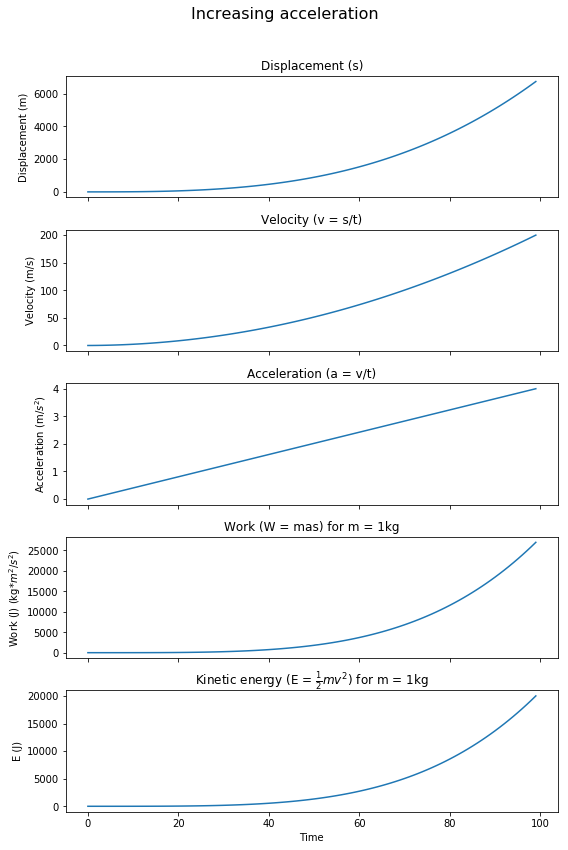

In [3]:
fig = plot_acceleration(np.linspace(0, 4, 100))
fig.suptitle('Increasing acceleration', size=16)

Text(0.5,0.98,'Increasing acceleration crossing zero')

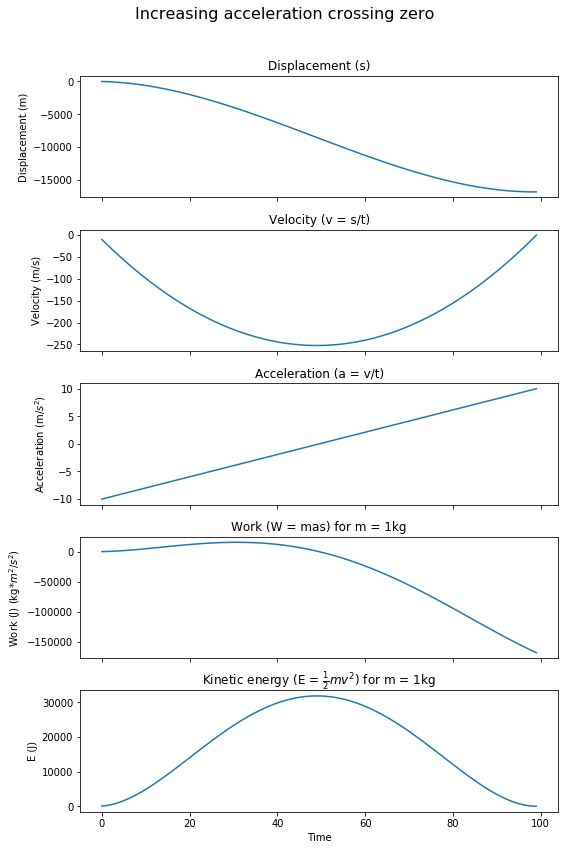

In [4]:
fig = plot_acceleration(np.linspace(-10.0, 10.0, 100))
fig.suptitle('Increasing acceleration crossing zero', size=16)

Text(0.5,0.98,'Decreasing acceleration crossing zero')

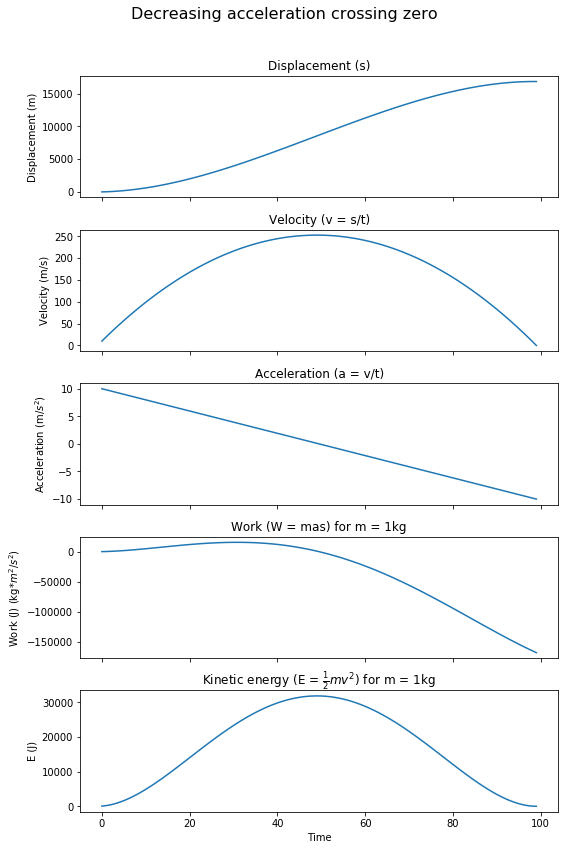

In [5]:
fig = plot_acceleration(np.linspace(10.0, -10.0, 100))
fig.suptitle('Decreasing acceleration crossing zero', size=16)

Text(0.5,0.98,'Parabolic acceleration')

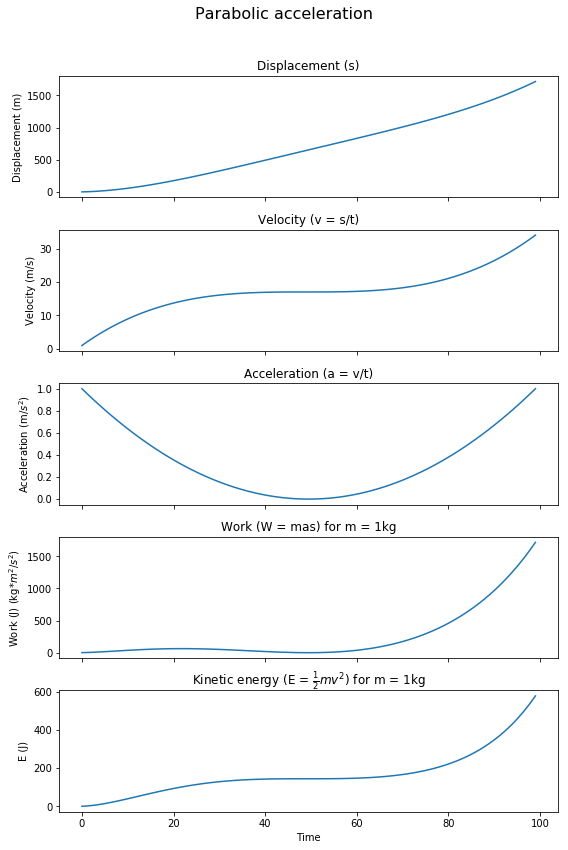

In [6]:
fig = plot_acceleration(np.linspace(-1.0, 1.0, 100) ** 2)
fig.suptitle('Parabolic acceleration', size=16)

In [7]:
def displace_coordinates(coordinates, t):
    return np.maximum(0, coordinates + amplitude * np.sin(wave_constant * coordinates - angular_frequency * t))

## Wave Propagation

The following is a visualization (based on a [Mathematica notebook by Mats Bengtsson](http://library.wolfram.com/infocenter/MathSource/780/)) of the way sound waves propagate as longitudinal waves through a medium.  Notice that each particle only moves back and forth, but their collective movement creates an emergent wave with its own measurable characteristics.

The particle movements are the only thing being explicitly modelled here.  All other charts are derived from _empirical measurements_ of these virtual particles.  The units and magnitude aren't to be taken too seriously in this example.

In [8]:
from matplotlib import animation
from IPython.display import HTML
import matplotlib.cm as cm
import matplotlib.ticker as mtick

num_frames = 60
num_atoms = 2400
tube_length = 100
tube_width = 20
wave_length = tube_length / 5
wave_constant = 2 * np.pi / wave_length
amplitude = 0.10 * wave_length
angular_frequency = 4 * np.pi

pressure_line_displacement = tube_length / 2

atom_coordinates = np.random.rand(num_atoms, 2) * (tube_length, tube_width)
atom_coordinates = atom_coordinates[atom_coordinates[:,0].argsort()]
total_pressure_values = np.zeros(num_frames)
old_coords = atom_coordinates.copy()
new_coords = atom_coordinates.copy()
diffs = np.zeros(old_coords.shape)

fig, axes = plt.subplots(5, 1, figsize=(12, 20))

fig.suptitle('Longitudinal Waves', size=16)
axes[0].set_title('Particle displacements')
axes[0].set_xlabel('Displacement x (m)')
axes[0].set_ylabel('Displacement y (m)')
axes[0].set_xlim([0, tube_length])
axes[0].set_ylim([0, tube_width])

# highlight a few points on the scatter plot
highlight_points = np.random.randint(0, num_atoms, 5)
colors = np.full(num_atoms, 'black')
sizes = np.full(num_atoms, 3)
colors[highlight_points] = 'r'
sizes[highlight_points] = 30
scatter = axes[0].scatter(atom_coordinates[:,0], atom_coordinates[:,1], s=sizes, c=colors)

def animate(i):
    old_coords[:,0] = displace_coordinates(atom_coordinates[:,0], 0) if i == 0 else new_coords[:,0]
    new_coords[:,0] = displace_coordinates(atom_coordinates[:,0], (i + 1) / num_frames)
    diffs[:] = new_coords - old_coords
    
    crossing_indices = np.where((new_coords[:,0] >= pressure_line_displacement - 4) & (new_coords[:,0] <= pressure_line_displacement + 4))
    crossing_diffs = diffs[crossing_indices]
    crossing_diff_magnitudes = np.linalg.norm(crossing_diffs, axis=1)
    total_pressure_values[i] = crossing_diffs[:,0].sum()

    scatter.set_offsets(new_coords)

    axes[1].cla()
    axes[1].hist(new_coords[:,0], bins=200)
    axes[1].set_title('Density')
    axes[1].set_xlabel('Displacement x (m)')
    axes[1].set_ylabel('Linear Density ($m^{-1}$)')
    axes[1].set_xlim([0, tube_length])
    axes[1].set_ylim([0, 50])

    colors = np.arctan2(diffs[:, 0], diffs[:, 1]) * np.linalg.norm(diffs, axis=1)
    colors /= colors.max()
    axes[2].cla()
    axes[2].quiver(new_coords[:, 0], new_coords[:, 1], diffs[:, 0], diffs[:, 1], color=cm.coolwarm(colors), pivot='mid')
    axes[2].axvline(x=pressure_line_displacement, linewidth=4, color='g', label='Measurement area')
    axes[2].set_title('Particle displacements with velocity')
    axes[2].set_xlabel('Displacement x (m)')
    axes[2].set_ylabel('Displacement y (m)')
    axes[2].set_xlim([0, tube_length])

    axes[3].cla()
    axes[3].plot(new_coords[:,0], diffs[:,0])
    axes[3].set_title('Total velocity at displacement')
    axes[3].set_xlabel('Displacement x (m)')
    axes[3].set_ylabel('Displacement y (m)')
    axes[3].set_xlim([0, tube_length])

    axes[4].cla()
    axes[4].plot(total_pressure_values[1:i], c='g')
    axes[4].set_title('Approx. pressure on green line above')
    axes[4].set_xlabel('Time')
    axes[4].set_ylabel('Sound Pressure Level (SPL)')
    axes[4].set_xlim([0, num_frames - 1])
    axes[4].yaxis.set_ticks([])

    fig.tight_layout()
    fig.subplots_adjust(top=0.95)

anim = animation.FuncAnimation(fig, animate, frames=num_frames, interval=42)
plt.close()
HTML(anim.to_html5_video())

## Proximity Effect

The following is a demonstration of the _proximity effect_ described on p125.  To quote the author,

_"There's another important and practical microphone design problem that arises from the geometry of waveforms. Waves expand from a sound source spherically under normal conditions; what happens when a curved wave front encounters a flat microphone diaphragm?_

_If the diaphragm is near the sound source, and the wavelength is sufficiently short, the diameter of the diaphragm is large in comparison to the diameter of the spherically expanding wave.  As shown, the diaphragm cuts across several high and low pressure areas. The high pressure areas cancel the low pressure areas for a diaphragm in this position, so it receives little net energy."_

In the following animation, the orange line corresponds to the close diaphragm receiving less net energy (diaphragm _**a**_ in the diagram on p125) , and the green line corresponds to the far diaphram receiving more energy (_diaphragm **b**_).

In [9]:
def cartesian_to_polar(a):
    return np.array([np.arctan2(a[:,0], a[:,1]), np.linalg.norm(a, axis=1)]).T

def polar_to_cartesian(a):
    return np.array([a[:,1] * np.cos(a[:,0]), a[:,1] * np.sin(a[:,0])]).T

In [11]:
np.random.seed(1234)

num_frames = 60
num_atoms = 6000
cyl_radius = 20
wave_length = cyl_radius / 8
wave_constant = 2 * np.pi / wave_length
amplitude = 0.10 * wave_length

pressure_line_displacements = [2 * cyl_radius / 6, 7 * cyl_radius / 8]
pressure_line_colors = ['orange', 'g']
total_pressure_values = [np.zeros(num_frames), np.zeros(num_frames)]

atom_coordinates = np.random.rand(num_atoms, 2) * 2 * cyl_radius - cyl_radius
polar_coords = cartesian_to_polar(atom_coordinates)
old_polar_coords = polar_coords.copy()
new_polar_coords = polar_coords.copy()
new_coords = atom_coordinates.copy()
old_coords = atom_coordinates.copy()
diffs = np.zeros(old_coords.shape)

fig, axes = plt.subplots(4, 1, figsize=(10, 24), gridspec_kw={'height_ratios':[3/8,3/8,1/8,1/8]})

fig.suptitle('Longitudinal Waves', size=16)
axes[0].set_title('Particle displacements')
axes[0].set_xlabel('Displacement x (m)')
axes[0].set_ylabel('Displacement y (m)')
axes[0].set_xlim([-cyl_radius, cyl_radius])
axes[0].set_ylim([-cyl_radius, cyl_radius])

# highlight a few points on the scatter plot
highlight_points = np.random.randint(0, num_atoms, 5)
colors = np.full(num_atoms, 'black')
sizes = np.full(num_atoms, 3)
colors[highlight_points] = 'r'
sizes[highlight_points] = 30
scatter = axes[0].scatter(atom_coordinates[:,0], atom_coordinates[:,1], s=sizes, c=colors)

def animate(i):
    old_polar_coords[:,1] = displace_coordinates(polar_coords[:,1], 0) if i == 0 else new_polar_coords[:,1]
    new_polar_coords[:,1] = displace_coordinates(polar_coords[:,1], (i + 1) / num_frames)

    old_coords[:] = polar_to_cartesian(old_polar_coords)
    new_coords[:] = polar_to_cartesian(new_polar_coords)

    scatter.set_offsets(new_coords)

    diffs[:] = new_coords - old_coords

    colors = np.arctan2(diffs[:, 0], diffs[:, 1]) * np.linalg.norm(diffs, axis=1)
    colors /= colors.max()
    axes[1].cla()
    axes[1].quiver(new_coords[:, 0], new_coords[:, 1], diffs[:, 0], diffs[:, 1], color=cm.coolwarm(colors), pivot='mid')

    axes[1].set_title('Particle displacements with velocity')
    axes[1].set_xlabel('Displacement x (m)')
    axes[1].set_ylabel('Displacement y (m)')
    axes[1].set_xlim([-cyl_radius, cyl_radius])
    axes[1].set_ylim([-cyl_radius, cyl_radius])

    for j, pressure_line_displacement in enumerate(pressure_line_displacements):
        crossing_indices = np.where((new_coords[:,0] >= pressure_line_displacement - 8) & (new_coords[:,0] <= pressure_line_displacement + 8))
        crossing_diffs = diffs[crossing_indices]
        crossing_diff_magnitudes = np.linalg.norm(crossing_diffs, axis=1)
        total_pressure_values[j][i] = crossing_diffs[:,0].sum()

        axes[1].axvline(x=pressure_line_displacement, linewidth=4, color=pressure_line_colors[j], label='Measurement area')

        pressure_ax = axes[2 + j]
        pressure_ax.cla()
        pressure_ax.plot(total_pressure_values[j][1:i], c=pressure_line_colors[j])
        pressure_ax.set_title('Approx. pressure on ' + pressure_line_colors[j] + ' line above')
        pressure_ax.set_xlabel('Time')
        pressure_ax.set_ylabel('Sound Pressure Level (SPL)')
        pressure_ax.set_xlim([0, num_frames - 1])
        #pressure_ax.yaxis.set_ticks([])

    #fig.tight_layout()
    fig.subplots_adjust(top=0.95)


anim = animation.FuncAnimation(fig, animate, frames=num_frames, interval=42)
plt.close()
HTML(anim.to_html5_video())